In [275]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.rcParams['figure.dpi'] = 100
from poisson1d import stiffnessMatrix1DFE, massMatrix1DFE
from scipy.linalg import solve

In [276]:
T = 10.0
w = 2 * np.pi / T 
sigma = 1e-2
mu = np.pi * 4e-7

In [277]:
z = np.arange(-60000, 00000.1, 500)
zm = z[:-1] + np.diff(z)/2

In [278]:
k2float = w * mu * sigma
k2 = np.ones(len(z)-1) * k2float
k2[zm > 0] = 0  # air
A, b = stiffnessMatrix1DFE(x=z, uR=1)
M = massMatrix1DFE(x=z, a=k2)
AM = A*(1+1j) + M * 1j
M[5, 5], A[5, 5], M[-5, -5], A[-5, -5]

(2.6318945069571624e-06, 0.004, 2.6318945069571624e-06, 0.004)

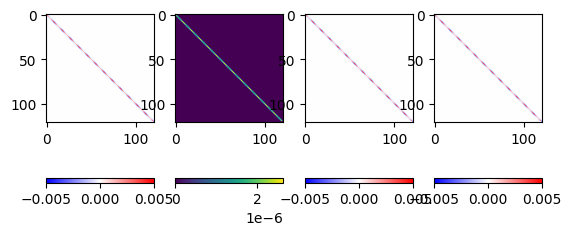

In [279]:
fig, ax = plt.subplots(ncols=4)
cc = 0.005
kw = dict(cmap="bwr", vmin=-cc, vmax=cc)
plt.colorbar(ax[0].imshow(A, **kw), orientation="horizontal")
plt.colorbar(ax[1].imshow(M), orientation="horizontal")
plt.colorbar(ax[2].imshow(np.real(AM), **kw), orientation="horizontal")
plt.colorbar(ax[3].imshow(np.imag(AM), **kw), orientation="horizontal")

In [280]:
D = np.vstack([np.hstack([A, -M]), np.hstack([M, A])])
d = np.hstack([b, b*0])
uri = np.linalg.solve(D, d)
u = uri[:len(z)] + uri[len(z):] * 1j


Text(0.5, 0, 'phase (°)')

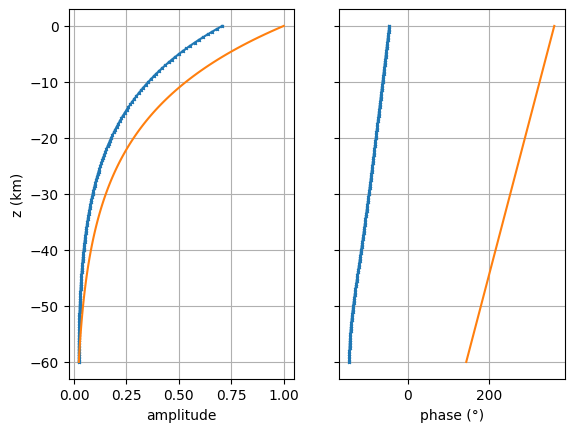

In [288]:
# u = np.linalg.solve(AM, b)
k = np.sqrt(-k2float*1j)
zEarth = z[z<=0]
uAna = np.exp(1j*k*zEarth)
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].plot(np.abs(u), z/1000, "x-")
ax[0].plot(np.abs(uAna), zEarth/1000, "-")
ax[1].plot(np.unwrap(np.angle(u))*180/np.pi, z/1000, "x-")
ax[1].plot(np.unwrap(np.angle(uAna))*180/np.pi, zEarth/1000, "-")
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel("amplitude")
ax[0].set_ylabel("z (km)")
ax[1].set_xlabel("phase (°)")

Text(0.5, 0, 'imag')

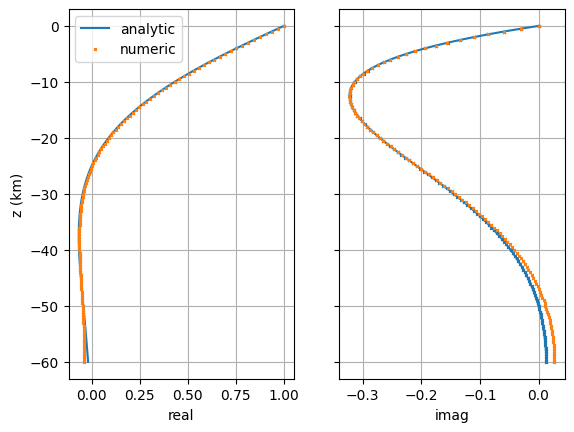

In [287]:
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].plot(np.real(uAna), zEarth/1000, "-", label="analytic")
ax[0].plot(np.real(u), z/1000, "x", label="numeric")
ax[1].plot(np.imag(uAna), zEarth/1000, "x-")
ax[1].plot(np.imag(u), z/1000, "x")
ax[0].legend()
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel("real")
ax[0].set_ylabel("z (km)")
ax[1].set_xlabel("imag")